In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
img = plt.imread("/content/elephant.jpg") #BGR format
# Add any image you want 

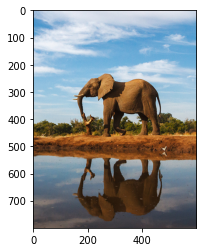

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
img.shape

(800, 600, 3)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img1=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [ ]:
img1.shape

(800, 600, 3)

In [ ]:
all_pixel = img.reshape(600*800,3)
all_pixel.shape

(480000, 3)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# number of colors you want in the image -> n_clusters
km = KMeans(n_clusters=2,n_jobs=-1)

In [ ]:
km.fit(all_pixel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
centre = km.cluster_centers_
centre

array([[160.89882203, 190.7242112 , 212.34883897],
       [ 93.28777848,  69.71082502,  49.35913505]])

In [ ]:
centre = np.array(centre,dtype="uint")
centre

array([[160, 190, 212],
       [ 93,  69,  49]], dtype=uint64)

In [ ]:
np.unique(km.labels_,return_counts=True)

(array([0, 1], dtype=int32), array([250829, 229171]))

In [ ]:
new_img = np.zeros((all_pixel.shape[0],3),dtype="uint")

In [ ]:
# There are 2 clusters hence 2 labels
km.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
centre[km.labels_[5]]

array([160, 190, 212], dtype=uint64)

In [ ]:
for i in range(new_img.shape[0]):
  new_img[i] = centre[km.labels_[i]]


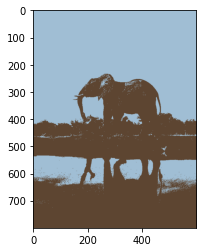

In [ ]:
plt.imshow(new_img.reshape(800,600,3))
plt.show() # Here image has only 2 colors